In [1]:
import sys
from pathlib import Path
sys.path.insert(1,str(Path.home()))

import pyIOTA.lattice as plat
import pyIOTA.gui.plots as plots
from ocelot import *
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


[2020-06-17 15:06:50,240] {numexpr.utils:_init_num_threads:129} INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
[2020-06-17 15:06:50,242] {numexpr.utils:_init_num_threads:141} INFO - NumExpr defaulting to 8 threads.


initializing ocelot...


This notebook shows the basics of lattice creation and manipulation.
We make a so-called ideal T-insert lattice for integrable nonlinear optics,
and then plot its twiss functions.

In [2]:
# Make elements. QI is a meta-element that is 'compiled' into a subsequence of element
qi = plat.OctupoleInsert()
qi.configure()
f0, betae, alfae, betas = qi.calculate_optics_parameters()

# Use ideal matrix to close optics
mat = Matrix(l=0.0, eid='TInsert', r11=1, r22=1, r33=1, r44=1, r55=1, r66=1, r21=-1/f0, r43=-1/f0)

# Make final sequence list
sequence = qi.to_sequence()+[mat]

# Box is the root container, and wraps OCELOT magnetic lattice
box = plat.LatticeContainer('ideal', sequence, reset_elements_to_defaults=False)
box.pc = 100.0 #MeV

# We now manipulate lattice using box - first, merge drifts to speed things up
box.merge_drifts()

# Split up an element - strengths get scaled automatically
box.split_elements(box.get_first('QI09',el_type=Octupole), n_parts=2)

# If element is unique, you can access box as dict
box.rotate_lattice(box['QI09_1'])

# Precompute lattice properties
box.lattice.update_transfer_maps()
box.update_element_positions();


QI optics: mu0:0.300|f0:0.688|1/f0:1.454|betaedge:1.893|alphaedge:1.376|betastar:0.654


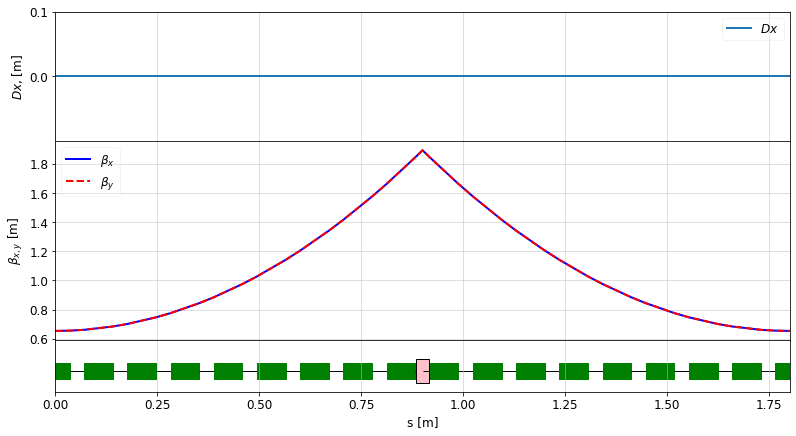

In [3]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plots.plot_opt_func(fig=fig,lat=box.lattice,tws=box.update_twiss());